# PROJECT 2 : Part 2
## Ames Housing Data and Kaggle Challenge

### EDA, Visualisation, Feature Engineering, Feature Selection
This notebook will focus on the above listed. This is a continuation from the train.csv dataset from Part 1. 

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder

In [2]:
# Load data
trainNum = pd.read_csv('datasets/trainNum.csv')
trainCat = pd.read_csv('datasets/trainCat.csv')

All missing values have been dealt with and data will remain split. This is necessary for the EDA and data visualisation processes, together with feature engineering as both will be handled differently. 

#### Numerical features EDA and Data Visualisation

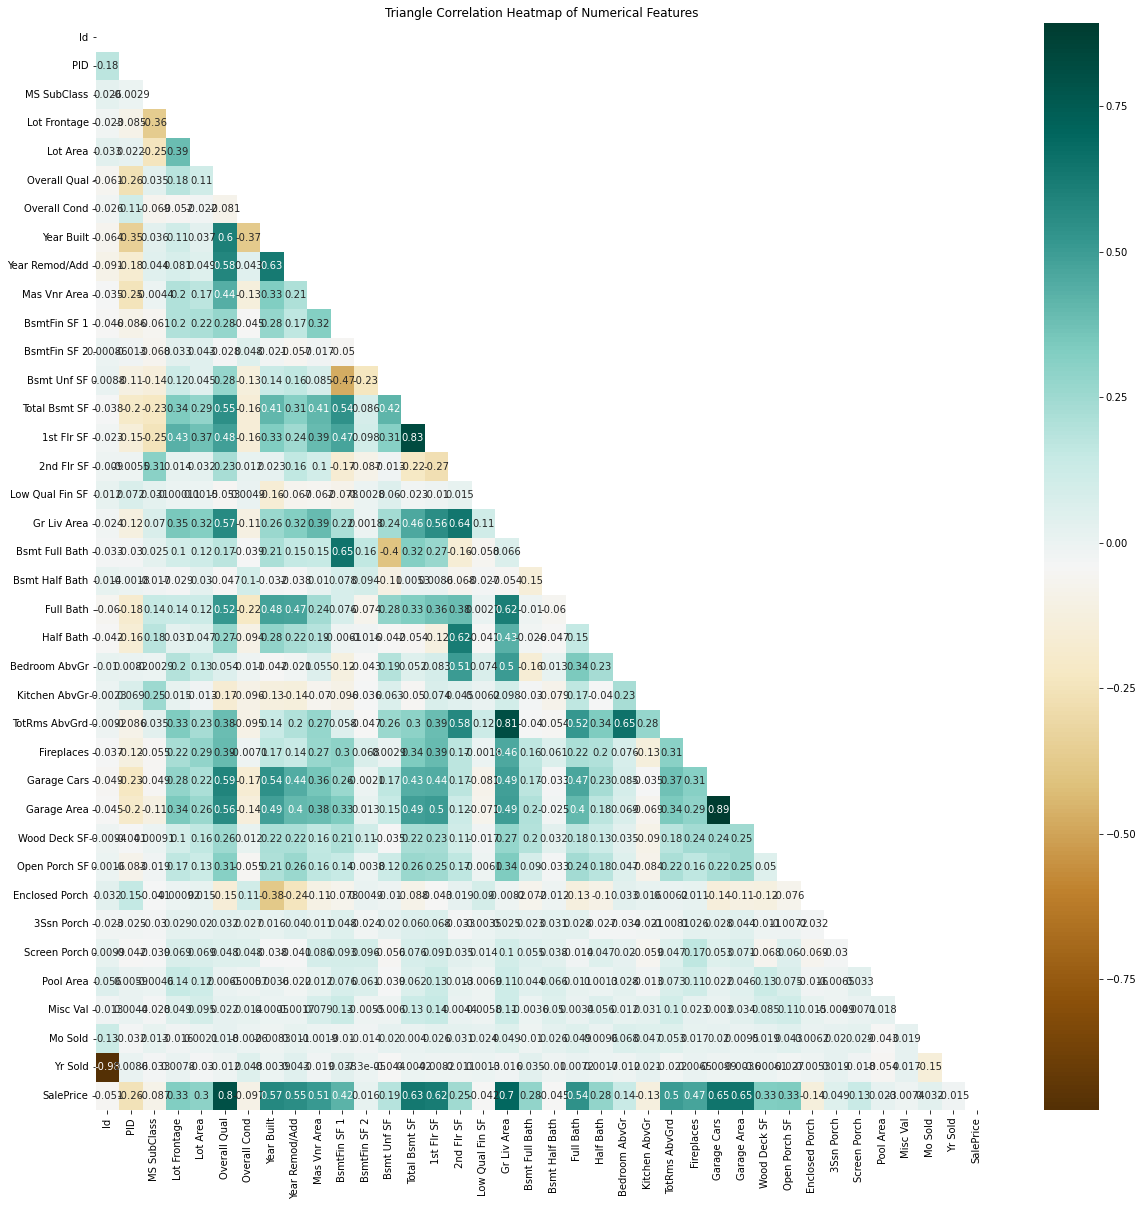

In [3]:
# Correlation heatmap for trainNum features

plt.figure(figsize=(20,20))
mask = np.triu(np.ones_like(trainNum.corr(), dtype=np.bool_))
heatmap = sns.heatmap(trainNum.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap of Numerical Features');

As there is still a lot of features it is very difficult to see let alone analyse the visual. Focus should be on SalePrice as the model will be trained to predict it. 

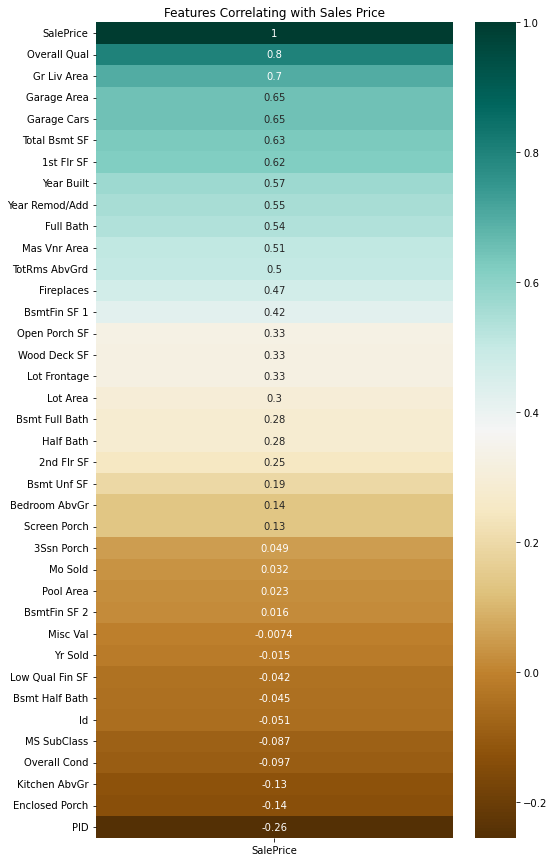

In [4]:
# Isolate and sort SalePrice
CorrSaleSorted = trainNum.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

# Create a correlation heatmap against it.
plt.figure(figsize=(8,15))
heatmapSale = sns.heatmap(CorrSaleSorted, annot=True, cmap='BrBG')
heatmapSale.set_title('Features Correlating with Sales Price');

This clearly shows all the correlation of the features against the SalePrice. Features with negative values would not be useful for the machine learning algorithm, it might do more damage in fact. And features with low correlations would just create 'noise'. 

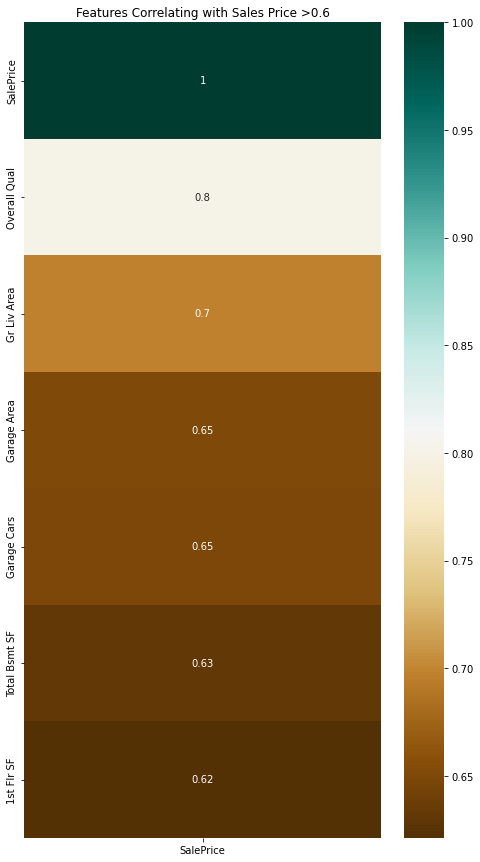

In [5]:
# Filtered Correlation Matrix Heatmap

# Isolate and sort SalePrice
CorrSaleSorted = trainNum.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
CorrSaleSorted = CorrSaleSorted.loc[CorrSaleSorted['SalePrice'] > 0.6]

# Create a correlation heatmap against it.
plt.figure(figsize=(8,15))

heatmapSale = sns.heatmap(CorrSaleSorted, annot=True, cmap='BrBG')
heatmapSale.set_title('Features Correlating with Sales Price >0.6');

Features with a correlation of 0.6 and above would be sufficient for the model to train on. 
These features are also typically things that home owners tend to look out for when looking to purchase a new house. The features includes the area of different parts of the house and the quality of it. 

In [6]:
# Create list of features from above filtered correlation excluding SalePrice
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF']

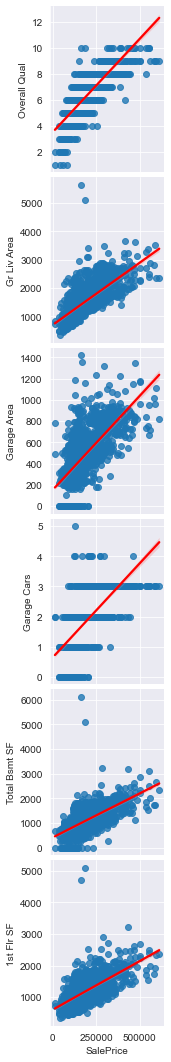

In [7]:
# Create pairplot
sns.set_style('darkgrid')
sns.pairplot(trainNum, y_vars=features , x_vars= ['SalePrice'], kind='reg', plot_kws={'line_kws':{'color':'red'}}) ;

The pairplot clearly shows a positive linear regression. In some features there are outliers depicted. However there are not many and it is not a cause for concern. 

In [8]:
# Add SalePrice to list of features
features.append('SalePrice')
trainNumE = trainNum[features]
trainNumE.shape

(2048, 7)

#### Categorical features EDA and Data Visualisation

In [9]:
# Add SalePrice to df
SalePrice = trainNum.loc[:,'SalePrice']

Categorical feaures can be analyse through box plots. The features will be plotted against the SalePrice to see any variance between its values that would affect SalePrice

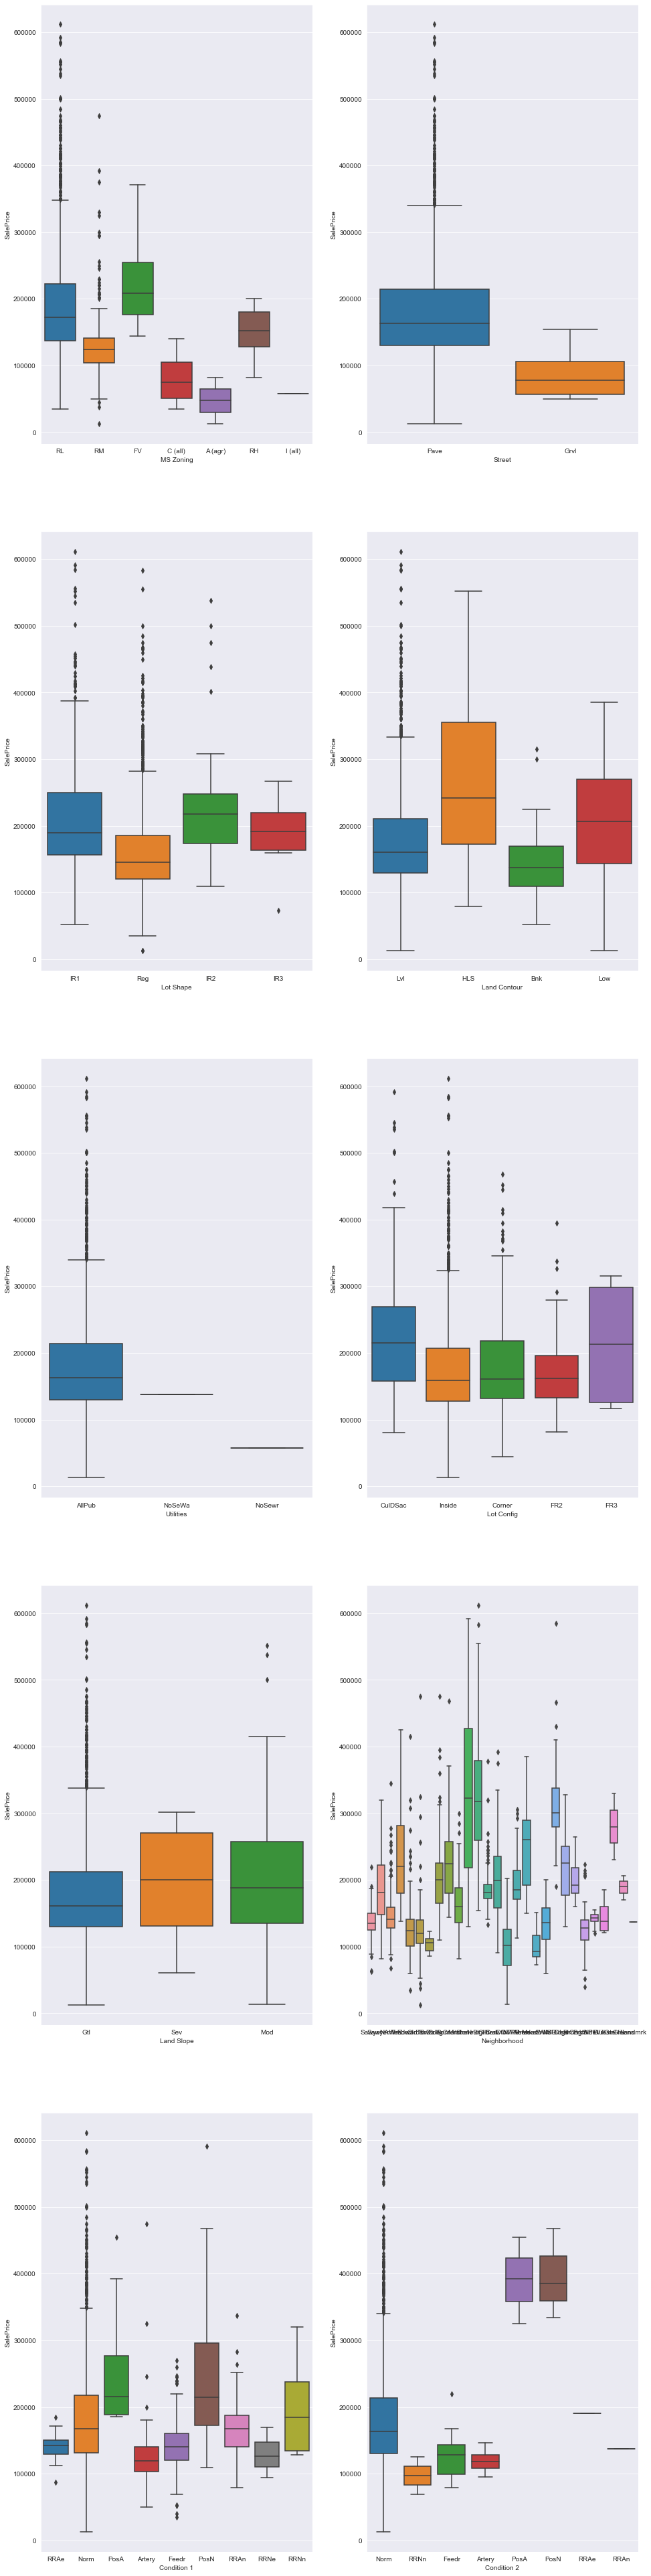

In [10]:
fig = plt.figure(figsize = (16,70))

ax1 = fig.add_subplot(5,2,1)
sns.boxplot(data = trainCat, x = 'MS Zoning', y = SalePrice, ax=ax1)

ax2 = fig.add_subplot(5,2,2)
sns.boxplot(data = trainCat, x = 'Street', y = SalePrice, ax=ax2)

ax3 = fig.add_subplot(5,2,3)
sns.boxplot(data = trainCat, x = 'Lot Shape', y = SalePrice, ax=ax3)

ax4 = fig.add_subplot(5,2,4)
sns.boxplot(data = trainCat, x = 'Land Contour', y = SalePrice , ax=ax4)


ax5 = fig.add_subplot(5,2,5)
sns.boxplot(data = trainCat, x = 'Utilities', y = SalePrice, ax=ax5)


ax6 = fig.add_subplot(5,2,6)
sns.boxplot(data = trainCat, x = 'Lot Config', y = SalePrice, ax=ax6)

ax7 = fig.add_subplot(5,2,7)
sns.boxplot(data = trainCat, x = 'Land Slope', y = SalePrice, ax=ax7)

ax8 = fig.add_subplot(5,2,8)
sns.boxplot(data = trainCat, x = 'Neighborhood', y = SalePrice, ax=ax8)

ax9 = fig.add_subplot(5,2,9)
sns.boxplot(data = trainCat, x = 'Condition 1', y = SalePrice, ax=ax9)

ax10 = fig.add_subplot(5,2,10)
sns.boxplot(data = trainCat, x = 'Condition 2', y = SalePrice, ax=ax10);



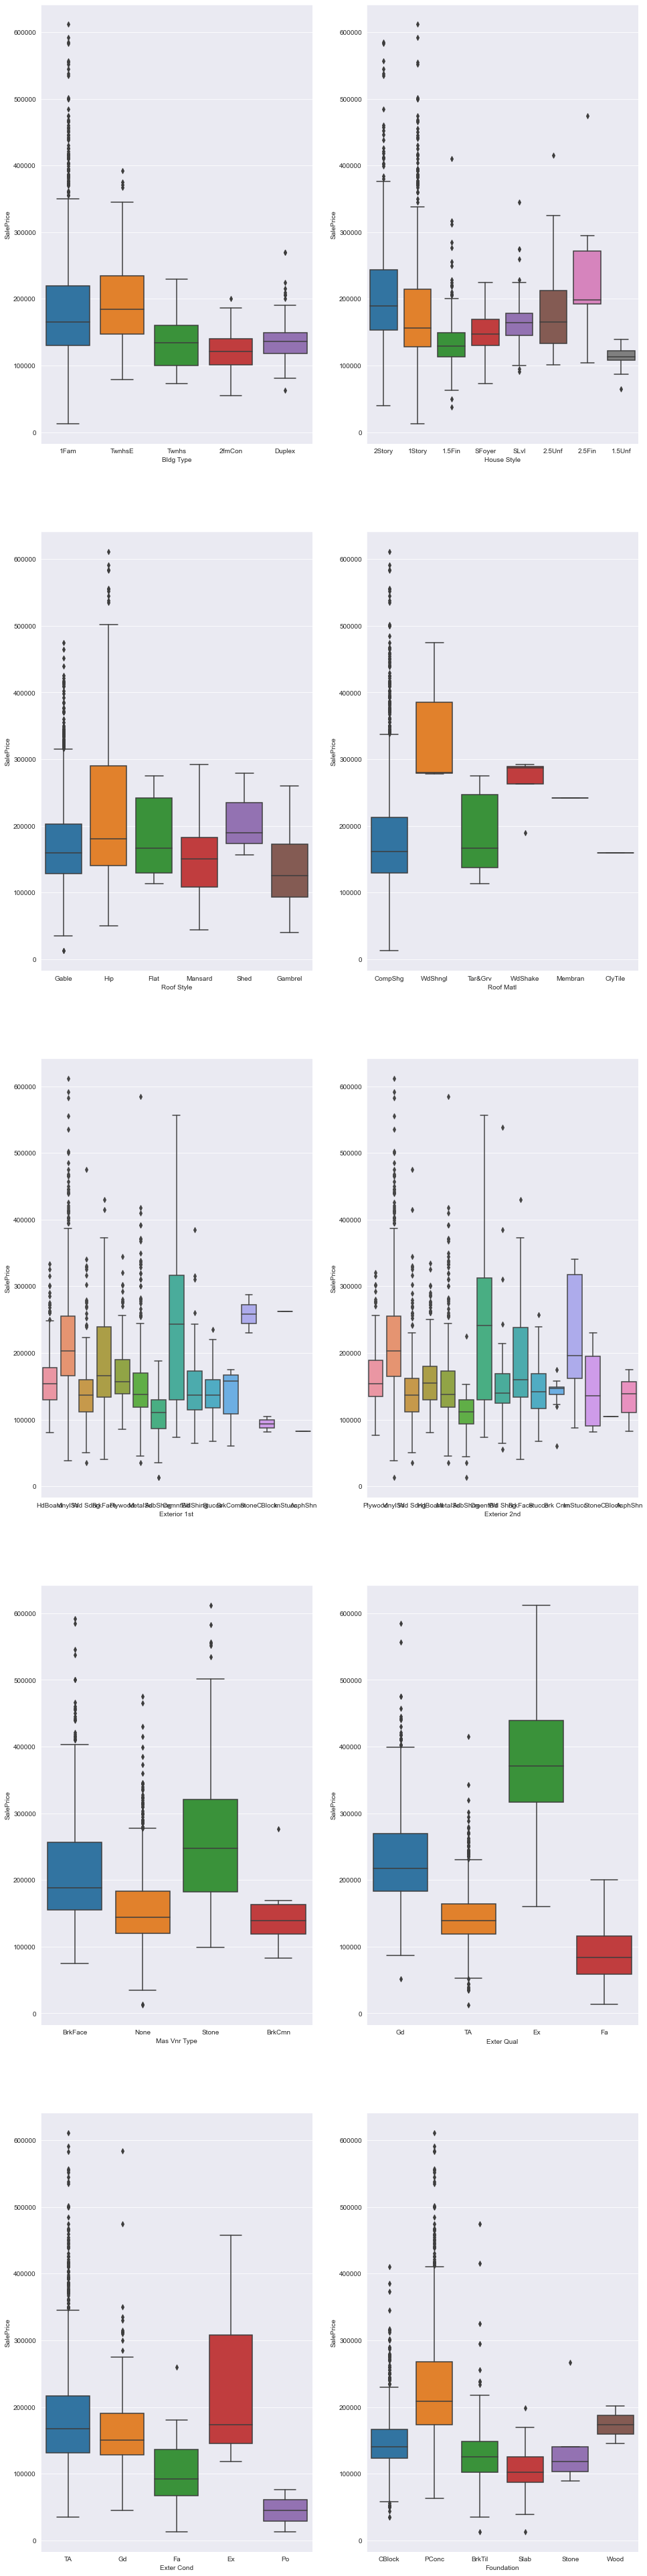

In [11]:
fig = plt.figure(figsize = (16,70))

ax1 = fig.add_subplot(5,2,1)
sns.boxplot(data = trainCat, x = 'Bldg Type', y = SalePrice, ax=ax1)

ax2 = fig.add_subplot(5,2,2)
sns.boxplot(data = trainCat, x = 'House Style', y = SalePrice, ax=ax2)

ax3 = fig.add_subplot(5,2,3)
sns.boxplot(data = trainCat, x = 'Roof Style', y = SalePrice, ax=ax3)

ax4 = fig.add_subplot(5,2,4)
sns.boxplot(data = trainCat, x = 'Roof Matl', y = SalePrice , ax=ax4)


ax5 = fig.add_subplot(5,2,5)
sns.boxplot(data = trainCat, x = 'Exterior 1st', y = SalePrice, ax=ax5)


ax6 = fig.add_subplot(5,2,6)
sns.boxplot(data = trainCat, x = 'Exterior 2nd', y = SalePrice, ax=ax6)

ax7 = fig.add_subplot(5,2,7)
sns.boxplot(data = trainCat, x = 'Mas Vnr Type', y = SalePrice, ax=ax7)

ax8 = fig.add_subplot(5,2,8)
sns.boxplot(data = trainCat, x = 'Exter Qual', y = SalePrice, ax=ax8)

ax9 = fig.add_subplot(5,2,9)
sns.boxplot(data = trainCat, x = 'Exter Cond', y = SalePrice, ax=ax9)

ax10 = fig.add_subplot(5,2,10)
sns.boxplot(data = trainCat, x = 'Foundation', y = SalePrice, ax=ax10);



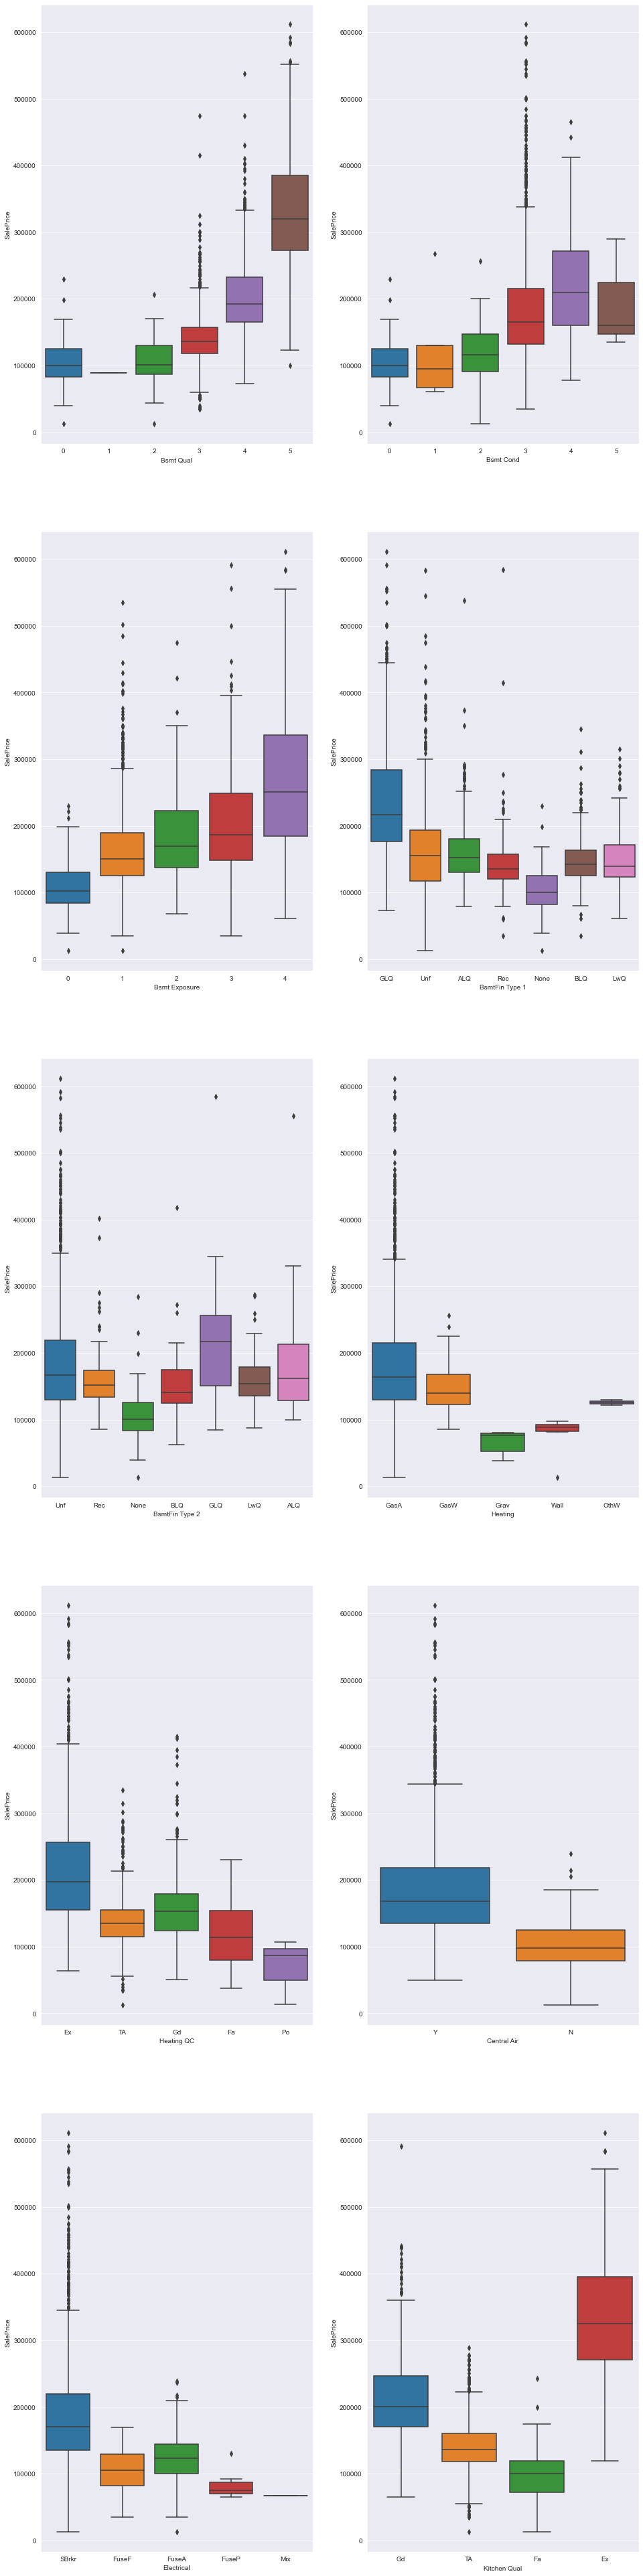

In [12]:
fig = plt.figure(figsize = (16,70))

ax1 = fig.add_subplot(5,2,1)
sns.boxplot(data = trainCat, x = 'Bsmt Qual', y = SalePrice, ax=ax1)

ax2 = fig.add_subplot(5,2,2)
sns.boxplot(data = trainCat, x = 'Bsmt Cond', y = SalePrice, ax=ax2)

ax3 = fig.add_subplot(5,2,3)
sns.boxplot(data = trainCat, x = 'Bsmt Exposure', y = SalePrice, ax=ax3)

ax4 = fig.add_subplot(5,2,4)
sns.boxplot(data = trainCat, x = 'BsmtFin Type 1', y = SalePrice , ax=ax4)


ax5 = fig.add_subplot(5,2,5)
sns.boxplot(data = trainCat, x = 'BsmtFin Type 2', y = SalePrice, ax=ax5)


ax6 = fig.add_subplot(5,2,6)
sns.boxplot(data = trainCat, x = 'Heating', y = SalePrice, ax=ax6)

ax7 = fig.add_subplot(5,2,7)
sns.boxplot(data = trainCat, x = 'Heating QC', y = SalePrice, ax=ax7)

ax8 = fig.add_subplot(5,2,8)
sns.boxplot(data = trainCat, x = 'Central Air', y = SalePrice, ax=ax8)

ax9 = fig.add_subplot(5,2,9)
sns.boxplot(data = trainCat, x = 'Electrical', y = SalePrice, ax=ax9)

ax10 = fig.add_subplot(5,2,10)
sns.boxplot(data = trainCat, x = 'Kitchen Qual', y = SalePrice, ax=ax10);



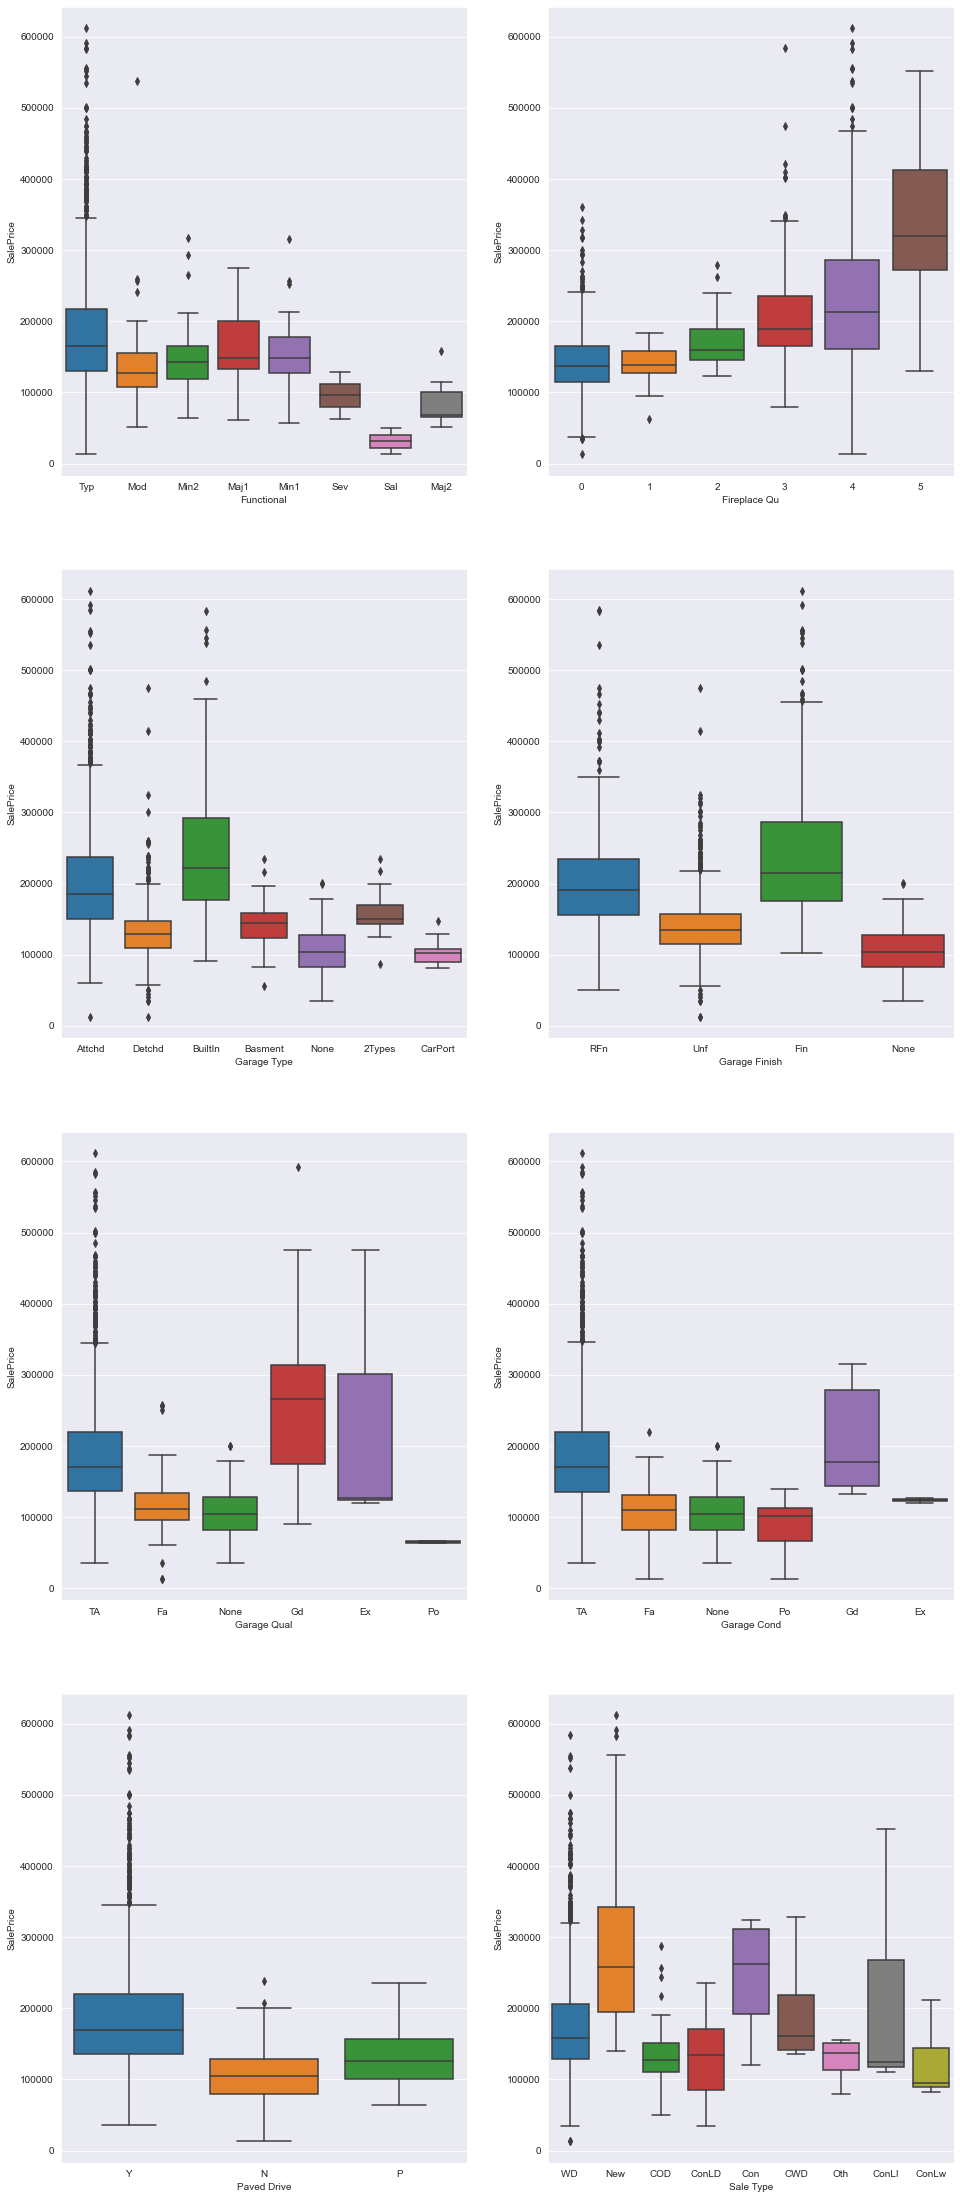

In [13]:
fig = plt.figure(figsize = (16,50))

ax1 = fig.add_subplot(5,2,1)
sns.boxplot(data = trainCat, x = 'Functional', y = SalePrice, ax=ax1)

ax2 = fig.add_subplot(5,2,2)
sns.boxplot(data = trainCat, x = 'Fireplace Qu', y = SalePrice, ax=ax2)

ax3 = fig.add_subplot(5,2,3)
sns.boxplot(data = trainCat, x = 'Garage Type', y = SalePrice, ax=ax3)

ax4 = fig.add_subplot(5,2,4)
sns.boxplot(data = trainCat, x = 'Garage Finish', y = SalePrice , ax=ax4)


ax5 = fig.add_subplot(5,2,5)
sns.boxplot(data = trainCat, x = 'Garage Qual', y = SalePrice, ax=ax5)


ax6 = fig.add_subplot(5,2,6)
sns.boxplot(data = trainCat, x = 'Garage Cond', y = SalePrice, ax=ax6)

ax7 = fig.add_subplot(5,2,7)
sns.boxplot(data = trainCat, x = 'Paved Drive', y = SalePrice, ax=ax7)

ax8 = fig.add_subplot(5,2,8)
sns.boxplot(data = trainCat, x = 'Sale Type', y = SalePrice, ax=ax8);



After sifting through all 38 features, 
MS Zoning, Street, Neighbourhood, Exter Qual, Exter Cond, Bsmt Cond, Bsmt Qual, BsmtFin Type 2, Kitchen Qual, Electrical, Functional, Garage Qual, Garage Cond, Paved Drive, and Sale Type showed bigger changes amongst the different values within each feature that would affect SalePrice.

In [14]:
# List of features selected
catFeatList = ['MS Zoning', 'Street', 'Neighbourhood', 'Exter Qual', 'Exter Cond', 'Bsmt Cond', 'Bsmt Qual', 'BsmtFin Type 2', 'Kitchen Qual', 'Electrical', 'Functional', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type']

# Filter trainCat to only containing the features selected
trainCatFil = trainCat.filter(catFeatList, axis=1)
trainCatFil.head()

,MS Zoning,Street,Exter Qual,Exter Cond,Bsmt Cond,Bsmt Qual,BsmtFin Type 2,Kitchen Qual,Electrical,Functional,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,RL,Pave,Gd,TA,3,3,Unf,Gd,SBrkr,Typ,TA,TA,Y,WD
1,RL,Pave,Gd,TA,3,4,Unf,Gd,SBrkr,Typ,TA,TA,Y,WD
2,RL,Pave,TA,Gd,3,3,Unf,Gd,SBrkr,Typ,TA,TA,Y,WD
3,RL,Pave,TA,TA,3,4,Unf,TA,SBrkr,Typ,TA,TA,Y,WD
4,RL,Pave,TA,TA,4,2,Unf,TA,SBrkr,Typ,TA,TA,N,WD


### Feature Engineering categorical features
Only numerical values can be used to train machine learning models. 

In [15]:
# Instatiate onehotencoder
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

# Separate object-types from df
Cat_list = trainCatFil.select_dtypes('object').columns.to_list()
Cat_train = trainCatFil[Cat_list]

In [16]:
# Encode df
cat_encoded = ohe.fit_transform(Cat_train[Cat_list])

cat_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [17]:
# Extract column names for OHE array
column_name = ohe.get_feature_names_out(Cat_list)

In [18]:
# Save as df
cat_train_E = pd.DataFrame(cat_encoded, columns=column_name)
cat_train_E.reset_index(inplace=True, drop=True)
trainCat.reset_index(inplace=True, drop=True)

In [19]:
# Concatenate with trainCat
trainCatE = pd.concat([cat_train_E, trainCatFil], axis =1)


In [20]:
# Drop object columns from df
trainCatE.drop(Cat_list, axis=1, inplace=True)


The values are now all numerical. This also allows for further feature selection by doing a correlation matrix of the features against SalePrice. 

In [21]:
trainCatE['SalePrice'] = trainNumE.loc[:,'SalePrice']

In [22]:
trainCatE.corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice           1.000000
Bsmt Qual           0.617419
Kitchen Qual_Ex     0.550987
Exter Qual_Ex       0.494263
Exter Qual_Gd       0.447106
Sale Type_New       0.358378
Kitchen Qual_Gd     0.306959
Paved Drive_Y       0.289538
Garage Cond_TA      0.272168
Electrical_SBrkr    0.252748
Name: SalePrice, dtype: float64

From here it is clear to see that only Bsmt Qual had a correlation of more than 0.6, which is consistent to the numerical features selected. Bsmt Qual would be the only categorical feature selected. 

In [23]:
#Add bsmt qual to rest of the features and create new df
train_feat = pd.DataFrame(trainNumE)
train_feat['Bsmt Qual'] = trainCatE.loc[:,'Bsmt Qual']
train_feat.head()

,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,SalePrice,Bsmt Qual
0,6,1479,475.0,2.0,725.0,725,130500,3
1,7,2122,559.0,2.0,913.0,913,220000,4
2,5,1057,246.0,1.0,1057.0,1057,109000,3
3,5,1444,400.0,2.0,384.0,744,174000,4
4,6,1445,484.0,2.0,676.0,831,138500,2


All features are now selected and combined into a single dataframe and ready to be used to train the model. This will continue in the next notebook, Part 3.  

In [24]:
# Save df as csv
train_feat.to_csv('datasets/train_feat.csv', index=False)